In [4]:
import random

# given an initial starting point, and a gridlike city structure, conduct
# a "random walk" of n blocks, where a random walk is defined as a set of n
# random directional choices, where the walker can go in any direction, including
# backtracing
def random_walk(n):
    """return coordinates after 'n' block random walk"""
    x = 0
    y = 0
    for i in range(n):
        # choose a random direction for the next step
        step = random.choice(['N', 'S', 'E', 'W'])
        if step is 'N':
            y += 1
        elif step is 'S':
            y -= 1
        elif step is 'E':
            x += 1
        else:
            x -= 1
    return x, y

In [2]:
for i in range(100):
    walk = random_walk(10)
    print(walk, "distance from home = ", abs(walk[0]) + abs(walk[1]))

(3, 3) distance from home =  6
(2, 0) distance from home =  2
(1, 5) distance from home =  6
(0, 0) distance from home =  0
(-4, -2) distance from home =  6
(-3, 3) distance from home =  6
(0, 2) distance from home =  2
(3, -1) distance from home =  4
(1, -1) distance from home =  2
(3, 3) distance from home =  6
(0, -2) distance from home =  2
(2, -2) distance from home =  4
(3, 1) distance from home =  4
(-1, -1) distance from home =  2
(3, -3) distance from home =  6
(0, 6) distance from home =  6
(-2, 0) distance from home =  2
(0, 4) distance from home =  4
(0, -2) distance from home =  2
(0, -2) distance from home =  2
(0, -4) distance from home =  4
(-2, 0) distance from home =  2
(-3, 1) distance from home =  4
(-3, -3) distance from home =  6
(1, 1) distance from home =  2
(3, 5) distance from home =  8
(2, -4) distance from home =  6
(3, 3) distance from home =  6
(2, 0) distance from home =  2
(0, 2) distance from home =  2
(-2, 0) distance from home =  2
(-3, -1) distance f

In [3]:
def improved_random_walk(n):
    x, y = 0, 0
    for i in range(n):
        # each of the following random choices represents a direction
        # represented as the change in x and y, e.g. north --> x += 0, y += 1
        (dx, dy) = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x += dx
        y += dy
    return x, y

In [4]:
for i in range(100):
    walk = improved_random_walk(10)
    print(walk, "distance from home = ", abs(walk[0]) + abs(walk[1]))

(1, -5) distance from home =  6
(0, -2) distance from home =  2
(0, -2) distance from home =  2
(2, -2) distance from home =  4
(1, 1) distance from home =  2
(2, 2) distance from home =  4
(-2, 2) distance from home =  4
(-2, 0) distance from home =  2
(-3, -1) distance from home =  4
(1, 1) distance from home =  2
(3, 1) distance from home =  4
(3, -3) distance from home =  6
(0, 2) distance from home =  2
(1, -3) distance from home =  4
(-1, 5) distance from home =  6
(0, 2) distance from home =  2
(-3, 1) distance from home =  4
(2, 0) distance from home =  2
(0, 2) distance from home =  2
(0, 4) distance from home =  4
(1, -1) distance from home =  2
(-2, 2) distance from home =  4
(-3, -1) distance from home =  4
(1, 3) distance from home =  4
(2, 6) distance from home =  8
(0, 0) distance from home =  0
(1, -1) distance from home =  2
(-1, -5) distance from home =  6
(0, -4) distance from home =  4
(2, 2) distance from home =  4
(-1, -1) distance from home =  2
(0, 2) distance f

In [5]:
# given a problem e.g. the maximum random walk such that on average
# the distance of the walk is less than some value k, can be completed
# by utilizing a monte carlo simulation

# num. of random walks for a given walk length
total_walks = 1000
# distance k, which will be used as the walk constraint
k = 4
# range of walk lengths that we will test
for walk_length in range(1, 31):
    # initialize variable to count the number of walks
    # less than or equal to the given value k, in distance from home
    max_k = 0
    for i in range(total_walks):
        walk = improved_random_walk(walk_length)
        distance = abs(walk[0]) + abs(walk[1])
        if distance <= k:
            max_k += 1
    if max_k >= total_walks / 2:
        print("for walks of distance {}, on average, the walk length was less than or equal to k = {}".format(walk_length, k))
    else: 
        print("for walks of distance {}, on average, the walk length was greater than k = {}".format(walk_length, k))
    print("for walks of distance {}, the number of walks less than length k was {}".format(walk_length, max_k))

for walks of distance 1, on average, the walk length was less than or equal to k = 4
for walks of distance 1, the number of walks less than length k was 1000
for walks of distance 2, on average, the walk length was less than or equal to k = 4
for walks of distance 2, the number of walks less than length k was 1000
for walks of distance 3, on average, the walk length was less than or equal to k = 4
for walks of distance 3, the number of walks less than length k was 1000
for walks of distance 4, on average, the walk length was less than or equal to k = 4
for walks of distance 4, the number of walks less than length k was 1000
for walks of distance 5, on average, the walk length was less than or equal to k = 4
for walks of distance 5, the number of walks less than length k was 890
for walks of distance 6, on average, the walk length was less than or equal to k = 4
for walks of distance 6, the number of walks less than length k was 941
for walks of distance 7, on average, the walk length w

In [7]:
import pandas as pd

retention_r = pd.read_csv('./monte_carlo_inputs/persistence_rates.csv')
# ['4yr_12', '4yr_23', '4yr_34', '4yr_grad', '2yr_12', '2yr_grad']
retention_r_bachelors = [
    retention_r['4yr_12'].values[0],
    retention_r['4yr_23'].values[0],
    retention_r['4yr_34'].values[0],
    retention_r['4yr_grad'].values[0],
]

retention_r_associates = [
    retention_r['2yr_12'].values[0],
    retention_r['2yr_grad'].values[0]
]


quantile_income = pd.read_csv('./monte_carlo_inputs/quantile_income.csv')
# headers: [25pct, 75pct, awd_lvl, major, median, n, years_after_grad]

#format the data
quantile_income = quantile_income.replace('Computer and Information Sciences and Support Services','cs')
quantile_income = quantile_income.replace('Engineering Technologies and Engineering-Related Fields','eng')
quantile_income = quantile_income.replace('Health Professions and Related Programs','heal')
quantile_income = quantile_income.replace('Bachelor\'s','Bachelors')
# majors: [cs, eng, heal, NaN]
# awd_lvl: [Associate, Bachelor's]

quantile_income['75pct'] =(quantile_income['75pct'].str[1:-1]).astype(float)*1000
quantile_income['25pct'] =(quantile_income['25pct'].str[1:-1]).astype(float)*1000

# uncomment to see the dataframe
quantile_income


,25pct,75pct,awd_lvl,major,50pct,n,Organization TTL,years_after_grad
0,27000.0,49800.0,Associate,cs,37875.14,2492.0,Statewide,1
1,29900.0,53600.0,Associate,cs,41132.45,2147.0,Statewide,2
2,31600.0,56200.0,Associate,cs,43094.44,1685.0,Statewide,3
3,33100.0,60900.0,Associate,cs,46751.76,1174.0,Statewide,4
4,33400.0,63600.0,Associate,cs,46582.82,754.0,Statewide,5
5,36100.0,65700.0,Associate,cs,47619.08,452.0,Statewide,6
6,37100.0,70000.0,Associate,cs,51253.10,222.0,Statewide,7
7,50400.0,89100.0,Bachelors,cs,67313.82,2426.0,Statewide,1
8,57400.0,96000.0,Bachelors,cs,74887.17,1919.0,Statewide,2
9,63200.0,105100.0,Bachelors,cs,82239.15,1429.0,Statewide,3


In [8]:
import numpy as np
from numpy.random import choice
# need to write a function that can take parameters for 
# all uncertain variables (retention rate, average earnings per student, # of scholarships alotted)
# and output the expected ROI

# tasks, plot the given retention rate data we have, determine appropriate means to randomize estimated retention
# rates for trials

# given expected career earnings for different STEM majors, we should eventually randomize allocation of scholarships
# to different majors, to determine average expected earnings per person

# account for retention rate uncertainty only

# basic problem: selecting 5 degree programs, to which we will all

def calculate_ROI(rates, scholarship_distribution):
    # given our expected retention rate, and how we allocate the scholarships
    # among N different degree programs, calculate and return ROI
    
    return None

def generate_random_scholarship_distributions(n):
    values = []
    limit = n
    while len(values) < limit:
        curr_values = []
        while n > 0 and len(curr_values) < 4:
            value = random.randint(1, int(n / 2))
            curr_values.append(value)
            n -= value
        if n > 0:
            curr_values.append(n)
        while len(curr_values) < 5:
            curr_values.append(0)
        values.append(curr_values)
    return values

def select_random_scholarship_distribution(values):
    return random.choice(values)

def generate_exp_retention(rate):
    # really just an arbitrary amount of randomness here. USING CLT this should be about right
    return np.random.normal(r,0.025,1)

generate_random_scholarship_distributions(10)

ValueError: empty range for randrange() (1,1, 0)

In [4]:
# def monte_carlo(trials, scholarships, retention_rates, retention_weights):
#     for i in range(trials):
#         generate_random_scholarship_distributions(scholarships)
#         generate_exp_retention(retention_rates, retention_weights)
        

In [28]:
# Try using a "walk" through 7 years after starting a career 
# Attempt at a basic version of a Markov Cahin Monte Carlo simulation

import scipy.stats as st

# hacky way of normalizing quartile values and pulling a random number
def rand_quartile(mean, q_1, q_3):
    deviation = (mean - q_1 + q_3 - mean)/2 
    sd = deviation/(st.norm.ppf(.75))
    return np.random.normal(mean,sd,1)[0]


def get_dist_val(mu, q_1, q_3, p):
    deviation = (mu - q_1 + q_3 - mu)/2 
    sd = deviation/(st.norm.ppf(.75))
    return mu + sd * st.norm.cdf(p)

def calculate_ROI(bachelors, retention_rates):
    # bachelors = boolean: True if bachelors degree, False if associates
    # retention_rates = a list of retention rates by year in school
    #         retention_rates[0] = rate retained from year 1 to 2
    
    # initialize the "state" of the student receiving a scholarship
    income = 0
    cost = 0
    dropout = False
        
    quality_of_student = np.random.uniform(0,1,1)
    for i in range(0, len(retention_rates)):
        if quality_of_student > retention_rates[i]:
            cost = 4500 * (i+1)
            dropout = True
            break
            
    if cost == 0:
        if bachelors:
            cost = 4500 * 4
        else:
            cost = 4500 * 2
            
    # Todo: randomize "quality" of student as a worker -- determine where on the distribution of incomes they
    #       will lie
    quality_of_worker = np.random.uniform(0,1,1)
    
    for i in range(1,8):
        cur_income = 0
        if dropout:
            income_year = quantile_income[quantile_income['years_after_grad']==i]
            cur_income = income_year[income_year['awd_lvl'] == 'Some College']['50pct'].values[0]
        elif bachelors:
            income_year = quantile_income[quantile_income['years_after_grad']==i]
            income_data = income_year[income_year['awd_lvl'] == 'Bachelors']
            cur_income = get_dist_val(
                    income_data['50pct'].values[0],
                    income_data['25pct'].values[0],
                    income_data['75pct'].values[0],
                    quality_of_worker)
        else:
            income_year = quantile_income[quantile_income['years_after_grad']==i]
            income_data = income_year[income_year['awd_lvl'] == 'Associate']
            cur_income = get_dist_val(
                    income_data['50pct'].values[0],
                    income_data['25pct'].values[0],
                    income_data['75pct'].values[0],
                    quality_of_worker)
        try:
            income += cur_income[0]
        except:
            income += cur_income
    #print(f'{income}, {cost}')
    return (income,cost)

def generate_distribution():
    # generate a provisional distribution of scholarships that max out in cost under the limit
    cost = 2500000
    
    # Use a uniform distribution from [1,138] for the amount of bachelor degree scholarships
    #    the motivation for this is because if given random choice, the sample will be rougly normally
    #    distributed around 50% of scholarships being allocated to bachelor's. We want to test many
    #    possible distributions
    num_of_bachelors = np.random.randint(1,138)
    cost -= num_of_bachelors
    num_of_associates = int(np.floor(cost/9000))
    scholarships = (num_of_bachelors * ['B']) + (num_of_associates * ['A'])
    return scholarships

def run_dist(current):
    # run an iteration of total ROI for the given distribution
    # current = a distribution of [x_1,x_2,...] where x_i in {A,B}
    for student in current:
        income = 0
        cost = 0
        if student == 'B':
            (cur_income, cur_cost) = calculate_ROI(True, retention_r_bachelors)
            income += cur_income
            cost += cur_cost
        else:
            (cur_income, cur_cost) = calculate_ROI(False, retention_r_associates)
            income += cur_income
            cost += cur_cost
    return [current.count('B'), (income-cost)/cost]

def monte_carlo(n):
    # build a list of results for monte carlo
    results = []
    for i in range(0,n):
        results.append(run_dist(generate_distribution()))
    return results

run_dist(generate_distribution())


129000.0, 4500
747850.7697846858, 18000
129000.0, 18000
750002.9304358355, 18000
129000.0, 9000
779419.0638640821, 18000
129000.0, 18000
765585.2609856728, 18000
770248.570161788, 18000
408544.57269022224, 9000
411999.5809767236, 9000
129000.0, 9000
129000.0, 4500
129000.0, 4500
129000.0, 4500
410994.10080437036, 9000
429844.17920689797, 9000
394738.24585853796, 9000
129000.0, 9000
400459.3356718094, 9000
419709.79751575575, 9000
427789.4012649295, 9000
129000.0, 4500
129000.0, 4500
129000.0, 9000
129000.0, 4500
392698.184200853, 9000
433345.4399764087, 9000
129000.0, 9000
416327.86214920785, 9000
129000.0, 9000
417253.6894231319, 9000
413532.13119829877, 9000
129000.0, 4500
129000.0, 9000
129000.0, 4500
129000.0, 4500
404960.151857789, 9000
401973.9648500633, 9000
433409.3227238303, 9000
392883.30150732497, 9000
433509.8799421586, 9000
129000.0, 9000
129000.0, 4500
129000.0, 4500
395691.06619127106, 9000
397729.31554271135, 9000
129000.0, 4500
421550.7439782601, 9000
129000.0, 4500
40

[9, 13.333333333333334]

In [18]:
import timeit

start = timeit.default_timer()

results = monte_carlo(100)
  
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  403.83305664651346


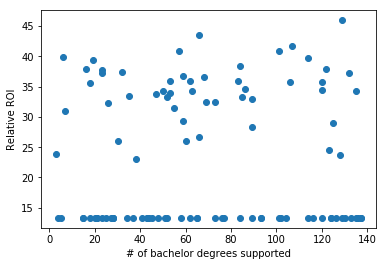

In [29]:
import matplotlib.pyplot as plt

#print(results)

plt.scatter(*zip(*results))
plt.xlabel('# of bachelor degrees supported')
plt.ylabel('Relative ROI')
plt.show()
